In [112]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import cross_val_score

In [95]:
data = pd.read_csv('C:\\Users\\Deepak\\Downloads\\diabetes.csv')

In [96]:
data.shape

(768, 9)

In [97]:
data.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
diabetes         int64
dtype: object

In [98]:
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
data.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [100]:
X = data.drop(['diabetes'], axis = 1)
y = data.diabetes

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [102]:
logreg = LogisticRegression()
print(np.mean(cross_val_score(logreg, X, y, cv = 10)))

0.7669685577580314


In [103]:
y.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [104]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[126  25]
 [ 32  48]]
             precision    recall  f1-score   support

          0       0.80      0.83      0.82       151
          1       0.66      0.60      0.63        80

avg / total       0.75      0.75      0.75       231



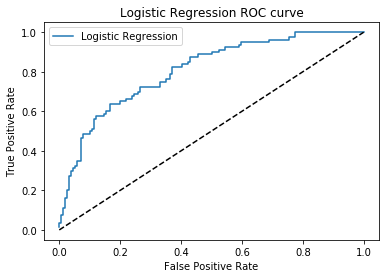

In [105]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend()
plt.show()

In [106]:
print(roc_auc_score(y_test, y_pred_prob))

0.805794701986755


In [107]:
logreg = LogisticRegression()
log_space = np.logspace(-4, 4, 200)
params = {'C': log_space}
logregcv = GridSearchCV(logreg, params, cv = 10)
logregcv.fit(X, y)
print(logregcv.best_params_)
print(logregcv.best_score_)

{'C': 5.05263106533568}
0.7747395833333334


In [108]:
logreg = LogisticRegression(C = 5.05)
print(np.mean(cross_val_score(logreg, X, y, cv = 10)))

0.7747778537252221


In [109]:
logreg = LogisticRegression(C = 5.05)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[122  29]
 [ 30  50]]
             precision    recall  f1-score   support

          0       0.80      0.81      0.81       151
          1       0.63      0.62      0.63        80

avg / total       0.74      0.74      0.74       231



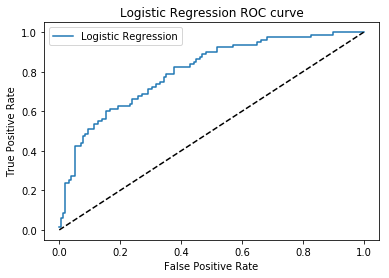

In [110]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend()
plt.show()

In [111]:
print(roc_auc_score(y_test, y_pred_prob))

0.8007450331125828
